
<div>
    <div style="width:fit-content; margin: 0 auto; padding: 15px;border: 4px solid #f6e496; background: #ad6a6a">
        <h1 style="text-align:center; color:#f6e496; font-family:Kristen ITC; margin:0;">
            Assessment 2
        </h1>
    </div>
    <br>
    <p style="text-align:justify; line-height:1;">
        For this assessment it requires to create a complete machine learning project, including data preparation, model selection, training, testing, and evaluation. It must inlcude:
    </p>
    <div style="line-height:0.5;">
        <ul >‣ documentation of process clearly with explanations and visuals</ul>
        <ul>‣ demonstrating the ability to apply key machine learning techniques</ul>
        <ul>‣ tools taught throughout the module.</ul>
    </div>
</div>


## <font color='#d4a994;'>1. Importing Libraries</font>

#### <font color='#000000'>The following libraries will be use</font>

> import <font color='#d4a994;'>**pandas**</font> as pd <br>
import <font color='#d4a994;'>**numpy**</font> as np <br>
import <font color='#d4a994;'>**matplotlib.pyplot**</font> as plt <br>
import <font color='#d4a994;'>**seaborn**</font> as sns <br>
import <font color='#d4a994;'>**train_test_split**</font> <br>
import <font color='#d4a994;'>**os**</font> <br>
import <font color='#d4a994;'>**glob**</font> <br><br>
from sklearn.model_selection import train_test_split <br>
from sklearn.preprocessing import StandardScaler, LabelEncoder <br>
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score <br>
from sklearn.feature_extraction.text import TfidfVectorizer <br>
from sklearn.cluster import KMeans <br>
from wordcloud import WordCloud <br>
from sklearn.linear_model import LogisticRegression

In [120]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

import os
import glob



## <font color='#d4a994;'>2. Uploading and Inspecting Data</font>

#### <font color='#000000'> Inspecting the following:</font>

> Finding out the number of rows <br>
> Finding out the number of colums <br>
> Knowing the title of the row

In [121]:

anm = pd.read_excel('/kaggle/input/animals/Animal Species.xlsx')

In [122]:

def styled_info(df):
    summary = pd.DataFrame({
        "Column": df.columns,
        "Non-Null Count": [df[col].notnull().sum() for col in df.columns],
        "Data Type": [df[col].dtype for col in df.columns],
        "Missing %": [100 * (df[col].isnull().sum() / len(df)) for col in df.columns]
    })

    styled = (
        summary.style
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#d4a994;'), ('font-weight', 'bold')]},
            {'selector': 'td', 'props': [('padding', '8px')]}
        ])
        .highlight_null(color='red') 
        .bar(subset=["Missing %"], color='lightblue')  
        .set_caption("📋 Styled DataFrame Info Summary")
        .hide(axis="index")
    )

    print(f"🔢 Total Rows: {df.shape[0]}")
    print(f"📁 Total Columns: {df.shape[1]}")
    print(f"🧠 Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

    return styled


styled_info(anm)

🔢 Total Rows: 502
📁 Total Columns: 20
🧠 Memory Usage: 643.0 KB


Column,Non-Null Count,Data Type,Missing %
Animal Name,502,object,0.000000
Habitat,502,object,0.000000
Class,502,object,0.000000
Diet,502,object,0.000000
Size,502,object,0.000000
Lifespan,502,object,0.000000
Region,502,object,0.000000
Status,502,object,0.000000
Movement,501,object,0.199203
Reproduction,501,object,0.199203


In [206]:

print("Describing the Dataset:")
display(anm.describe().style.set_table_styles(styles))

Describing the Dataset:


,Lifespan_num,Stable
count,502.000000,502.000000
mean,21.087649,0.818725
std,23.864895,0.385630
min,0.000000,0.000000
25%,10.000000,1.000000
50%,15.000000,1.000000
75%,25.000000,1.000000
max,400.000000,1.000000


## <font color='#d4a994;'>3. Features</font>

#### <font color='#000000'>Determine the X and Y</font>

> Finding out the number of rows <br>
> Finding out the number of colums <br>
> Knowing the title of the row

In [207]:

anm['Lifespan_num'] = ( 
    anm['Lifespan'] 
    .astype(str) 
    .str.extract('(\d+)')
    .astype(float) 
)

anm['Lifespan_num'] = anm['Lifespan_num'].fillna(0)
anm['Stable'] = (anm['Lifespan_num'] >= 10).astype(int)

X = anm.drop(columns=['Region'])
Y = anm['Stable']

styles = [
    {'selector': 'th', 'props': [('background-color', '#d4a994'),
                                 ('font-size', '14px'),
                                 ('font-weight', 'bold')]}
]

print("First 5 rows/Head:")
display(X.head().style.set_table_styles(styles))

print("\nLast 5 rows/Tail:")
display(X.tail().style.set_table_styles(styles)) 

First 5 rows/Head:


,Animal Name,Habitat,Class,Diet,Size,Lifespan,Status,Movement,Reproduction,Social,Domesticated,Activity,Vertebrate,Blood Type,Role,Cultural,Adaptations,Example Species,Fun Fact,Lifespan_num,Stable,Region_clean
0,Lion,Land,Mammal,Carnivore,Large,12 yrs,Vulnerable,Walk/Run,Live birth,Pride,Wild,Diurnal,Vertebrate,Warm,Predator,Symbol of strength,Sharp claws,Panthera leo,Known as “King of the Jungle”,12.000000,1,Africa
1,Tiger,Land,Mammal,Carnivore,Large,15 yrs,Endangered,Walk/Run,Live birth,Solitary,Wild,Nocturnal,Vertebrate,Warm,Predator,Cultural icon,Stripes,Bengal Tiger,Largest cat species,15.000000,1,Asia
2,Leopard,Land,Mammal,Carnivore,Medium,12 yrs,Vulnerable,Walk/Run,Live birth,Solitary,Wild,Nocturnal,Vertebrate,Warm,Predator,Folklore,Camouflage,African Leopard,Can carry prey up trees,12.000000,1,Africa
3,Cheetah,Land,Mammal,Carnivore,Medium,12 yrs,Vulnerable,Run,Live birth,Solitary,Wild,Diurnal,Vertebrate,Warm,Predator,Speed symbol,Lightweight body,Acinonyx jubatus,Fastest land animal,12.000000,1,Africa
4,Hyena,Land,Mammal,Carnivore,Medium,20 yrs,Least Concern,Walk/Run,Live birth,Clan,Wild,Nocturnal,Vertebrate,Warm,Predator,Trickster in folklore,Strong jaws,Spotted Hyena,Laugh-like calls,20.000000,1,Africa



Last 5 rows/Tail:


,Animal Name,Habitat,Class,Diet,Size,Lifespan,Status,Movement,Reproduction,Social,Domesticated,Activity,Vertebrate,Blood Type,Role,Cultural,Adaptations,Example Species,Fun Fact,Lifespan_num,Stable,Region_clean
497,Chinstrap Penguin,Land/Ice,Bird,Carnivore,Medium,20 yrs,Least Concern,Walk/Swim,Egg-laying,Colony,Wild,Diurnal,Vertebrate,Warm,Prey,Folklore,Black chinstrap,Pygoscelis antarcticus,Named for facial stripe,20.000000,1,Antarctica
498,Little Blue Penguin,Land/Ice,Bird,Carnivore,Small,15 yrs,Least Concern,Walk/Swim,Egg-laying,Colony,Wild,Nocturnal,Vertebrate,Warm,Prey,Folklore,Small size,Eudyptula minor,Smallest penguin,15.000000,1,Australia
499,Rockhopper Penguin,Land/Ice,Bird,Carnivore,Medium,20 yrs,Vulnerable,Walk/Swim,Egg-laying,Colony,Wild,Diurnal,Vertebrate,Warm,Prey,Folklore,Crest feathers,Eudyptes chrysocome,Known for hopping on rocks,20.000000,1,Subantarctic
500,Macaroni Penguin,Land/Ice,Bird,Carnivore,Medium,20 yrs,Vulnerable,Walk/Swim,Egg-laying,Colony,Wild,Diurnal,Vertebrate,Warm,Prey,Folklore,Yellow crest,Eudyptes chrysolophus,Named for flamboyant feathers,20.000000,1,Subantarctic
501,African Penguin,Land,Bird,Carnivore,Medium,20 yrs,Endangered,Walk/Swim,Egg-laying,Colony,Wild,Diurnal,Vertebrate,Warm,Prey,Cultural,Braying call,Spheniscus demersus,Nicknamed “jackass penguin”,20.000000,1,Africa


/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1939: UserWarning:

A function (restart) returned too many output values (needed: 3, returned: 4). Ignoring extra values.
    Output components:
        [group, group, group]
    Output values returned:
        [{'__type__': 'update', 'visible': True}, {'__type__': 'update', 'visible': False}, {'__type__': 'update', 'visible': False}, ""]



In [128]:

print("Feature Matrix (X):")
display(X.head().style.set_table_styles(styles))

print("\nTarget Vector (Y):")
display(Y.head().to_frame().style.set_table_styles(styles))

Feature Matrix (X):


,Animal Name,Habitat,Class,Diet,Size,Lifespan,Region,Status,Movement,Reproduction,Social,Domesticated,Activity,Vertebrate,Blood Type,Role,Cultural,Adaptations,Example Species,Fun Fact,Lifespan_num
0,Lion,Land,Mammal,Carnivore,Large,12 yrs,Africa,Vulnerable,Walk/Run,Live birth,Pride,Wild,Diurnal,Vertebrate,Warm,Predator,Symbol of strength,Sharp claws,Panthera leo,Known as “King of the Jungle”,12.000000
1,Tiger,Land,Mammal,Carnivore,Large,15 yrs,Asia,Endangered,Walk/Run,Live birth,Solitary,Wild,Nocturnal,Vertebrate,Warm,Predator,Cultural icon,Stripes,Bengal Tiger,Largest cat species,15.000000
2,Leopard,Land,Mammal,Carnivore,Medium,12 yrs,Africa/Asia,Vulnerable,Walk/Run,Live birth,Solitary,Wild,Nocturnal,Vertebrate,Warm,Predator,Folklore,Camouflage,African Leopard,Can carry prey up trees,12.000000
3,Cheetah,Land,Mammal,Carnivore,Medium,12 yrs,Africa,Vulnerable,Run,Live birth,Solitary,Wild,Diurnal,Vertebrate,Warm,Predator,Speed symbol,Lightweight body,Acinonyx jubatus,Fastest land animal,12.000000
4,Hyena,Land,Mammal,Carnivore,Medium,20 yrs,Africa,Least Concern,Walk/Run,Live birth,Clan,Wild,Nocturnal,Vertebrate,Warm,Predator,Trickster in folklore,Strong jaws,Spotted Hyena,Laugh-like calls,20.000000



Target Vector (Y):


,Stable
0,1
1,1
2,1
3,1
4,1


## <font color='#d4a994;'>4. Splitting the Data</font>

#### <font color='#000000'>The training and testing part of the data</font>


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [130]:

print("\n📊 **Dataset Split Summary**\n")
print(f"🔹 Training Set Shape: {X_train.shape}")
print(f"🔸 Testing Set Shape : {X_test.shape}\n")


📊 **Dataset Split Summary**

🔹 Training Set Shape: (401, 21)
🔸 Testing Set Shape : (101, 21)



In [183]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("\n📌 Categorical Columns Detected")
print("──────────────────────────────")
for col in categorical_cols:
    print(f"• {col}")
    
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)

print("\n✨ Encoding Complete")
print("Training Encoded Shape :", X_train_encoded.shape)
print("Testing Encoded Shape  :", X_test_encoded.shape)
print("\n")

#it Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, Y_train)


📌 Categorical Columns Detected
──────────────────────────────
• Animal Name
• Habitat
• Class
• Diet
• Size
• Lifespan
• Region
• Status
• Movement
• Reproduction
• Social
• Domesticated
• Activity
• Vertebrate
• Blood Type
• Role
• Cultural
• Adaptations
• Example Species
• Fun Fact

✨ Encoding Complete
Training Encoded Shape : (401, 1605)
Testing Encoded Shape  : (101, 1605)




LogisticRegression(max_iter=1000)

In [132]:

from sklearn.metrics import accuracy_score

# Predict on the test set
Y_pred = model.predict(X_test_encoded)

print("\n📊 Model Accuracy")
print("---------------------------")
print("Testing Accuracy:", accuracy_score(Y_test, Y_pred))


📊 Model Accuracy
---------------------------
Testing Accuracy: 1.0


In [168]:

#predictions using the trained model
Y_predict = model.predict(X_test_encoded)

# 🎯 Display results
print("\n📌 Prediction Summary")
print("────────────────────────────")
print(f"Target Variable: {Y_train.name}")
print(f"Number of Predictions: {len(Y_predict)}")
print("────────────────────────────")
print("Predicted Values:")
print(Y_predict.tolist())

print("────────────────────────────")
print("Predicted Values with region and animal name:")
print(results[['Animal Name', 'Region', 'Predicted_Stable']])


📌 Prediction Summary
────────────────────────────
Target Variable: Stable
Number of Predictions: 101
────────────────────────────
Predicted Values:
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
────────────────────────────
Predicted Values with region and animal name:
     Animal Name         Region  Predicted_Stable
268         Skua         Oceans                 1
73        Dugong   Indo-Pacific                 1
289        Saola           Asia                 1
155    Earthworm         Global                 0
104     Stingray         Oceans                 1
..           ...            ...               ...
86        Python    Asia/Africa                 1
75          Orca         Oceans                 1
440  Machairodus      

In [134]:

df = anm[['Habitat', 'Diet']].dropna()

diet_counts = df.groupby(['Habitat','Diet']).size().reset_index(name='Count')
diet_counts['Percent'] = 100 * diet_counts['Count'] / diet_counts['Count'].sum()

# the sunburst chart
fig = px.sunburst(
    diet_counts,
    path=['Habitat', 'Diet'],
    values='Count',
    color='Diet',
    color_discrete_sequence=px.colors.qualitative.Set3,
    hover_data={'Percent': ':.2f'},  
    title='🌍 Sunburst of Habitat and Diet',
)

# hovering the info 
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{customdata[0]}%<br>"
)

fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0),
    legend_title_text='Diet Categories',
    legend=dict(
        orientation="h",
        x=0.5, y=-0.1,
        xanchor="center",
        bgcolor='rgba(255,255,255,0.5)',
        bordercolor='black',
        borderwidth=1
    )
)

fig.show()

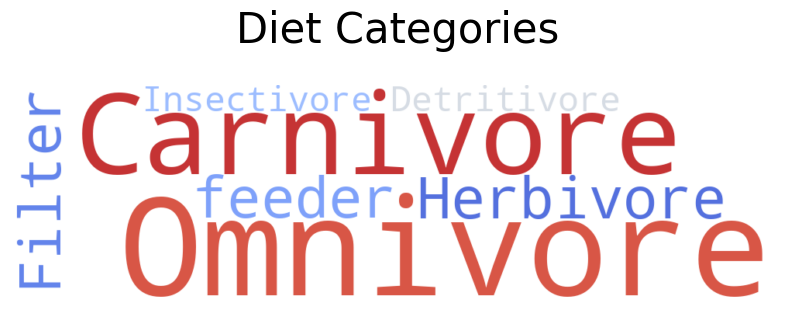

In [187]:

diet = set(anm['Diet'].dropna().astype(str))

text = " ".join(diet)

# Generate word cloud
wordcloud = WordCloud(
    width=1000, 
    height=300, 
    background_color="white",
    colormap='coolwarm').generate(text)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Diet Categories", fontsize=30, pad=30)
plt.show()


In [205]:

import gradio as gr
import pandas as pd
import random

df = pd.read_excel("/kaggle/input/animals/Animal Species.xlsx")

animal_col = "Animal Name"
fun_fact_col = "Fun Fact"

css = """
/* Soft pastel gradient background */
body {
    background: linear-gradient(135deg, #fdf6f0, #f7f2ff, #eefaff);
    font-family: 'Poppins', sans-serif;
    color: #444;
}

/* Center content */
.gradio-container {
    max-width: 650px !important;
    margin: 0 auto !important;
    padding-top: 40px;
}

/* Card-style container */
#quiz-card {
    background: #ffffffcc;
    padding: 28px;
    border-radius: 18px;
    box-shadow: 0 4px 16px rgba(0,0,0,0.06);
    backdrop-filter: blur(6px);
    animation: fadeIn 0.6s ease;
}

/* Buttons */
.gr-button {
    background-color: #ffdce5 !important;
    color: #444 !important;
    border-radius: 10px !important;
    border: none !important;
    font-size: 17px !important;
    padding: 10px 18px !important;
    transition: 0.2s ease;
}

.gr-button:hover {
    background-color: #ffc7d6 !important;
}

/* Radio buttons */
.gr-radio label {
    background: #ffffffaa;
    padding: 10px 14px;
    border-radius: 10px;
    border: 1px solid #eee;
    transition: 0.2s ease;
}

.gr-radio label:hover {
    background: #ffeef3;
    border-color: #ffcedd;
}

/* Headings */
h1, h2, h3 {
    color: #8a6fb4;
    font-weight: 600;
}

/* Fade-in animation */
@keyframes fadeIn {
    from { opacity: 0; transform: translateY(8px); }
    to { opacity: 1; transform: translateY(0); }
}

/* Floating pastel panda mascot */
#mascot {
    position: fixed;
    transform: translate(40px, -60px);
    left: 20px;
    width: 130px;
    opacity: 0.92;
    z-index: 999;
    animation: floaty 3s ease-in-out infinite;
    filter: drop-shadow(0 4px 8px rgba(0,0,0,0.08));
    border-radius: 20px;
}

/* Soft floating animation */
@keyframes floaty {
    0% { transform: translateY(0px); }
    50% { transform: translateY(-10px); }
    100% { transform: translateY(0px); }
}

"""

# GAME LOGIC
def pick_unique_animals(n=5):
    return df.sample(n).reset_index(drop=True)


def prepare_question(row):
    animal = row[animal_col]
    fact = row[fun_fact_col]

    choices = df[animal_col].sample(3).tolist()
    if animal not in choices:
        choices[random.randint(0, 2)] = animal
    random.shuffle(choices)

    return fact, animal, choices

# GRADIO UI

with gr.Blocks(css=css) as game:

    gr.Markdown("## ✨🐾 Animal Fun‑Fact Guessing Game 🐾✨")
    gr.Markdown("Guess the animal from one fun fact!")
    gr.Image("/kaggle/input/thepanda/panda.png", elem_id="mascot", show_label=False)
    
    intro = gr.Group(visible=True)
    quiz = gr.Group(visible=False)
    result = gr.Group(visible=False)

    # Intro screen
    with intro:
        with gr.Group(elem_id="quiz-card"):
            gr.Markdown("### Ready to play?")
            start_btn = gr.Button("Start Quiz", variant="primary")

    # Quiz screen
    with quiz:
        with gr.Group(elem_id="quiz-card"):
            question_counter = gr.Markdown("")
            fact_box = gr.Markdown("")
            choice = gr.Radio([], label="Which animal is this?")
            submit_btn = gr.Button("Submit Answer")

    # Result screen
    with result:
        with gr.Group(elem_id="quiz-card"):
            result_text = gr.Markdown("")
            play_again = gr.Button("Play Again", variant="secondary")

    # Hidden states
    quiz_data = gr.State([])
    current_index = gr.State(0)
    correct_answer = gr.State("")
    score_state = gr.State(0)


     # BUTTON LOGIC
    def start_game():
        animals = pick_unique_animals(5)
        idx = 0
        fact, animal, choices = prepare_question(animals.iloc[idx])

        return (
            gr.update(visible=False),
            gr.update(visible=True),
            animals,
            idx,
            0,
            gr.update(value=f"**Question 1 of 5**"),
            gr.update(value=f"**Fun Fact:** {fact}"),
            gr.update(choices=choices),
            animal
        )

    start_btn.click(
        start_game,
        inputs=[],
        outputs=[
            intro, quiz,
            quiz_data, current_index, score_state,
            question_counter, fact_box, choice, correct_answer
        ]
    )


    def submit_answer(user_choice, animals, idx, score):
        correct = animals.iloc[idx][animal_col]
        msg, add_score = check_answer(user_choice, correct)
        score += add_score

        idx += 1

        if idx >= 5:
            return (
                gr.update(visible=False),
                gr.update(visible=True),
                f"### Quiz Complete! 🎉\nYour final score: **{score}/5**",
                animals, idx, score,
                gr.update(), gr.update(), gr.update(), ""
            )

        fact, animal, choices = prepare_question(animals.iloc[idx])

        return (
            gr.update(visible=True),
            gr.update(visible=False),
            gr.update(),
            animals, idx, score,
            gr.update(value=f"**Question {idx+1} of 5**"),
            gr.update(value=f"**Fun Fact:** {fact}"),
            gr.update(choices=choices),
            animal
        )

    submit_btn.click(
        submit_answer,
        inputs=[choice, quiz_data, current_index, score_state],
        outputs=[
            quiz, result, result_text,
            quiz_data, current_index, score_state,
            question_counter, fact_box, choice, correct_answer
        ]
    )


    def restart():
        return (
            gr.update(visible=True),
            gr.update(visible=False),
            gr.update(visible=False),
            ""
        )

    play_again.click(
        restart,
        inputs=[],
        outputs=[intro, quiz, result]
    )


game.launch()

* Running on local URL:  http://127.0.0.1:7882
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://44b1e0532505dcd369.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
